In [1]:
import pandas as pd
import numpy as np

In [2]:
des = pd.read_csv("Genre Classification Dataset\description.txt")
des

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [8]:
data = pd.read_csv("Genre Classification Dataset\data_train.txt", sep=":::", names= ["Title", "Genre", "Description"], engine="python")

In [9]:
data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [11]:
print(data.describe())

                                 Title    Genre  \
count                            54214    54214   
unique                           54214       27   
top      Oscar et la dame rose (2009)    drama    
freq                                 1    13613   

                                              Description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the American academy ...  
freq                                                   12  


In [12]:
data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [13]:
X_test = pd.read_csv("Genre Classification Dataset\data_test.txt", sep=':::', names=['Id', 'Title', 'Description'], engine='python')

In [14]:
X_test.head()


,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [15]:
X_test.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

C:\Users\milan\AppData\Local\Temp\ipykernel_15452\973961872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y='Genre', order=data['Genre'].value_counts().index, palette='viridis')


<Axes: xlabel='count', ylabel='Genre'>

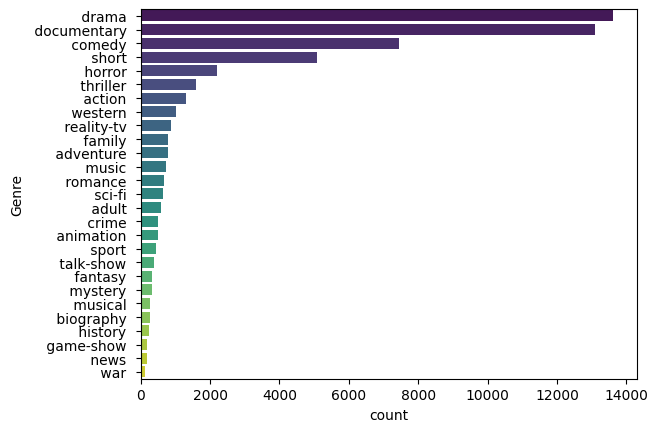

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

sns.countplot(data=data, y='Genre', order=data['Genre'].value_counts().index, palette='viridis')
               

In [28]:
import spacy
import re
import string

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Define the preprocess_text function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = re.sub('\s+', ' ', text).strip()
    
    # Lemmatize using spaCy
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]

    # Join the lemmatized words back into a string
    preprocessed_text = ' '.join(lemmatized_words)

    return preprocessed_text

# Apply the preprocess_text function to the 'Description' column
data['Text_cleaning'] = data['Description'].apply(preprocess_text)
X_test['Text_cleaning'] = X_test['Description'].apply(preprocess_text)

<Axes: xlabel='length_Text_cleaning', ylabel='Count'>

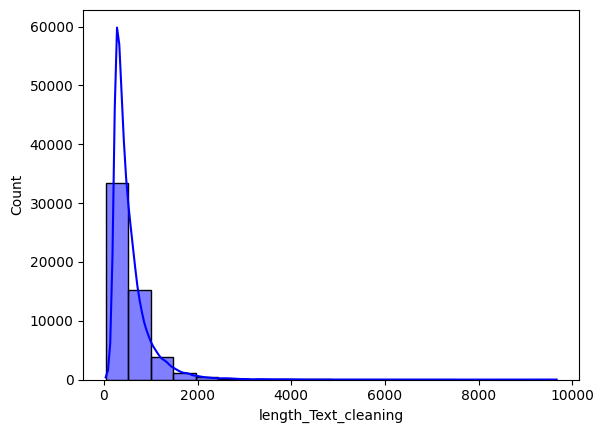

In [29]:
# Calculate the length of cleaned text
data['length_Text_cleaning'] = data['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
# plt.figure(figsize=(8, 7))
sns.histplot(data=data, x='length_Text_cleaning', bins=20, kde=True, color='blue')
# plt.xlabel('Length', fontsize=14, fontweight='bold')
# plt.ylabel('Frequency', fontsize=14, fontweight='bold')
# plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
# plt.show()

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(data['Text_cleaning'])

# Transform the test data
X_test1 = tfidf_vectorizer.transform(data['Text_cleaning'])

In [49]:
# Split the data into training and validation sets
X = X_train
y = data['Genre']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
# classifier = GaussianNB()
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4401918288296597
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.53      0.03      0.05      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.89      0.66      2659
       drama        0.38      0.88      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [34]:
# Use the trained model to make predictions on the test data
X_test_predictions = classifier.predict(X_test1)
data['Predicted_Genre'] = X_test_predictions

In [35]:
# Save the test_data DataFrame with predicted genres to a CSV file
data.to_csv('predicted_genres.csv', index=False)

# Display the 'test_data' DataFrame with predicted genres
print(data)

                                              Title          Genre  \
1                     Oscar et la dame rose (2009)          drama    
2                                     Cupid (1997)       thriller    
3                 Young, Wild and Wonderful (1980)          adult    
4                            The Secret Sin (1915)          drama    
5                           The Unrecovered (2007)          drama    
...                                             ...            ...   
54210                              "Bonino" (1953)         comedy    
54211                  Dead Girls Don't Cry (????)         horror    
54212    Ronald Goedemondt: Ze bestaan echt (2008)    documentary    
54213                     Make Your Own Bed (1944)         comedy    
54214   Nature's Fury: Storm of the Century (2006)        history    

                                             Description  \
1       Listening in to a conversation between his do...   
2       A brother and sister with a pas